# Objective: Assess understanding of optimization algorithms in artificial neural networks. Evaluate the application and comparison of different optimizers. Enhance knowledge of optimizers' impact on model convergence and performance.

## Part 1: Understanding Optimizer

### 1. What is the role of optimization algorithms in artificial neural networks? Why are they necessary?

**Optimization** algorithms play a crucial role in the training of artificial neural networks by minimizing the loss function (also known as the **cost function** or **objective function**), which measures how well the network’s predictions align with the actual target values. These algorithms adjust the model’s parameters (weights and biases) iteratively to improve its performance on the training data.

##### Role of Optimization Algorithms in Neural Networks:

1. **Minimizing the Loss Function:** The main task of an optimization algorithm is to find the set of model parameters (weights and biases) that minimizes the loss function. This loss function measures the difference between the predicted outputs and the true outputs. Lowering the loss function corresponds to improving the model's predictive accuracy.

2. **Efficient Parameter Updates:** Neural networks often have millions of parameters, making it infeasible to find the optimal set of parameters through brute force methods like grid search. Optimization algorithms efficiently update these parameters by computing the gradients (or slopes) of the loss function with respect to the parameters and using these gradients to make informed adjustments.

3. **Gradient-Based Learning:** Optimization algorithms like **Gradient Descent** use the derivative of the loss function (calculated using backpropagation) to determine the direction and magnitude of changes to the weights and biases. The network learns by adjusting its parameters in the direction that reduces the loss.

4. **Handling Non-Convex Problems:** The loss surface in neural networks, especially in deep networks, is often highly non-convex with many local minima and saddle points. Optimization algorithms help navigate this complex landscape to find good solutions, even if they are not globally optimal.


##### Why Optimization Algorithms Are Necessary:

1. **High Dimensionality:** Neural networks typically operate in a high-dimensional parameter space (hundreds, thousands, or even millions of parameters). Finding the optimal set of parameters in such a large space is computationally challenging. Optimization algorithms are designed to efficiently search for these parameters, avoiding brute-force methods.

2. **Iterative Improvement:** Training a neural network requires an iterative process of parameter updates based on feedback from the loss function. Without an optimization algorithm, it would be difficult to know how to adjust the parameters to minimize error and improve performance. Optimization algorithms provide a systematic way to make these updates.

3. **Preventing Overfitting and Underfitting:** A well-chosen optimization algorithm helps balance the model’s ability to generalize to new data (avoiding overfitting) while ensuring that the model captures the underlying patterns in the training data (avoiding underfitting). Regularization techniques, such as L2 regularization, can be incorporated into the optimization process to penalize overly complex models.

### 2. Explain the concept of gradient descent and its variants. Discuss their differences and tradeoffs in terms of convergence speed and memory requirements.

**Gradient Descent** is an optimization algorithm used to minimize a function by iteratively moving towards the minimum of the function. In the context of neural networks, gradient descent aims to minimize the loss function by updating the **model’s parameters (weights and biases)** in the direction of the steepest descent, i.e., the negative gradient of the loss function with respect to those parameters.

##### Key Variants of Gradient Descent:

1. **Batch Gradient Descent (GD):** Uses the entire dataset to compute the gradient of the loss function for each parameter update.

2. **Stochastic Gradient Descent (SGD):** Uses one data point (example) at a time to update the parameters.

3. **Mini-Batch Gradient Descent (MBGD):** Uses a small, random subset of the dataset (mini-batch) to compute the gradient at each update step.

4. **Momentum:** Improves gradient descent by adding a fraction of the previous update to the current update, helping it converge faster and avoid oscillations.

5. **Adagrad(Adaptive Gradient Descent):** Adjusts the learning rate individually for each parameter based on the historical sum of gradients, allowing it to adapt to sparse or dense gradients.

6. **RMSprop:** Addresses Adagrad's diminishing learning rate problem by using a **moving average of the squared gradients** to scale learning rates.

7. **Adam (Adaptive Moment Estimation):** Combines momentum and RMSprop by maintaining both first and second moment estimates of the gradient, providing an adaptive learning rate for each parameter.


##### Differences and Trade-offs:

|Point|Batch Gradient Descent|Stochastic Gradient Descent (SGD)|Mini-Batch Gradient Descent|Momentum|Adagrad|RMSprop|Adam|
|---|---|---|---|---|---|---|---|
|**Gradient Computation**|Full dataset|One data point per update|Small subset (mini-batch) of the dataset|Uses gradient of mini-batch with momentum factor|Sum of squared past gradients|Moving average of squared gradients|Momentum + RMSprop (first & second moment estimates)|
|**Memory Requirements**|High (must load entire dataset)|Low|Medium|Low (only needs momentum term)|High (stores past squared gradients)|Medium (maintains moving average)|Medium (momentum + moving average)|
|**Convergence Speed**|Slow, but stable|Faster (noisy)|Faster than Batch, less noisy than SGD|Faster than regular GD|Converges quickly at first, then slows|Fast convergence, smooth|Fast convergence, adaptive|
|**Advantages**|Stable updates, globally optimal step|Fast updates, good for online learning|Balances between stability and speed|Reduces oscillations, speeds up training|Adaptive learning rate|Adaptive learning rate, resolves Adagrad issues|Combines benefits of Momentum and RMSprop|
|**Disadvantages**|Computationally expensive, slow for large datasets|Highly noisy, can overshoot minima|Requires tuning of mini-batch size|Requires momentum hyperparameter|Learning rate decays too quickly|Requires tuning of decay rate|May not always generalize well, sensitive to hyperparameters|



### 3. Describe the challenges associated with traditional gradient descent optimization methods (e.g., slow convergence, local minima). How do modern optimizers address these challenges?

Traditional gradient descent optimization methods, such as Batch Gradient Descent (GD) and Stochastic Gradient Descent (SGD), are foundational techniques in training neural networks. However, they come with several challenges that can hinder performance and training efficiency. Modern optimizers, such as Momentum, RMSprop, and Adam, have been developed to address these challenges and improve the convergence of neural networks.

##### Challenges of Traditional Gradient Descent Optimization:

|Problem|Problem Description|Cause|
|---|---|---|
|**Slow Convergence**|In traditional gradient descent, convergence can be slow, especially when the loss function has flat regions, small gradients, or ill-conditioned curvature. It can take many iterations for the algorithm to reach the optimal minimum, especially if the learning rate is too low.|Gradients in regions of the loss surface may be small, leading to very small updates to the model parameters. The network struggles to make significant progress towards the global minimum.|
|**Oscillations Near Minima**|In traditional SGD, the updates can oscillate around the minima, especially in cases where the loss function has steep sides and flat valleys (common in saddle points or ravines).|Using a fixed learning rate means that even when the algorithm gets close to a minimum, the gradient steps can be too large, causing overshooting and slow final convergence.|
|**Sensitivity to Learning Rate**|Selecting an appropriate learning rate is crucial in traditional gradient descent. If the learning rate is too large, the model may fail to converge or diverge. If it’s too small, the model may take too long to converge or get stuck in local minima.|A fixed learning rate doesn’t adapt to the dynamics of the loss function’s landscape, causing inefficient or unstable learning.|
|**Local Minima and Saddle Points**|Traditional gradient descent is prone to getting stuck in local minima or saddle points (flat regions where the gradient is zero in many directions but not necessarily a minimum).|The non-convex nature of neural network loss surfaces means there are many suboptimal solutions that can trap the optimization process. In traditional methods, small gradients in these regions can prevent further progress.|
|**Vanishing/Exploding Gradients**|In deep neural networks, gradients can become extremely small (vanishing gradients) or excessively large (exploding gradients) as they propagate back through the layers, causing inefficient learning or instability.|This problem is particularly common with certain activation functions (e.g., sigmoid and tanh) and weight initialization methods. Traditional SGD struggles to cope with these phenomena.|
|**Noisy Updates in SGD**|In stochastic gradient descent, the updates to parameters can be noisy because they are based on a single training example (or mini-batch), which might not represent the overall trend in the dataset. This can lead to erratic updates and slow convergence.|The randomness in selecting individual examples for gradient updates introduces variance in the gradient estimates.|


##### How Modern Optimizers Address These Challenges:

1. **Momentum:**
    
    - **Addresses Slow Convergence and Oscillations:**
        
        - Momentum accelerates gradient descent by adding a fraction of the previous update to the current one, effectively smoothing out oscillations and speeding up convergence, especially in steep regions or ravines.
        - By considering past gradients, momentum helps the optimization algorithm continue moving in directions that have consistently reduced the loss.
        
        
2. **Nesterov Accelerated Gradient (NAG):**
    
    - **Improves Momentum:**
        
        - NAG takes the momentum concept further by calculating the gradient at a future position (an anticipated update), which leads to better convergence and more precise steps.
        - By "looking ahead," NAG prevents overshooting and improves convergence speed near minima.
        
        
3. **Adaptive Learning Rate Methods (Adagrad, RMSprop, Adam):**
    
    - **Address Sensitivity to Learning Rate:**
        
        - These methods adapt the learning rate for each parameter individually, based on how frequently the parameter is updated. This solves the issue of having to manually select a fixed learning rate.
        - Parameters that receive larger updates over time have their learning rates reduced, while those with smaller updates have their learning rates increased.
        
    - **Adagrad** adjusts the learning rate by dividing it by the sum of past squared gradients, making it suitable for sparse data.
    - **RMSprop** resolves the problem of Adagrad’s decaying learning rate by using a moving average of squared gradients.
    - **Adam** combines the advantages of both momentum and RMSprop by maintaining a moving average of both the first (mean) and second moments (variance) of the gradients, ensuring smooth and efficient learning across diverse tasks.

## Part 2: Optimizer Technique

### 5. Explain the concept of Stochastic Gradient Descent (SGD) and its advantages compared to traditional gradient descent. Discuss its limitations and scenarios where it is most suitable.

##### Concept of Stochastic Gradient Descent (SGD):

**Stochastic Gradient Descent (SGD)** is an optimization algorithm used to minimize the loss function of a machine learning model by iteratively updating the model's parameters (weights and biases). The key difference between SGD and traditional Batch Gradient Descent (GD) lies in how the gradients are calculated.

- **Traditional Batch Gradient Descent** computes the gradient of the loss function using the entire training dataset, making parameter updates only after processing the full dataset in each iteration.

- **SGD**, on the other hand, computes the gradient using a single training example (or a mini-batch in some cases) and updates the parameters after each example. This means SGD performs many more updates in each epoch compared to batch GD, leading to faster updates but with more variance.

Mathematically, the parameter update rule for SGD can be written as:

$$ \theta_{t+1} = \theta_{t} - \eta \nabla_{\theta}J(\theta; x^{(i)}, y^{(i)})  $$

- $\theta$ are the model parameters at time $t$
- $\eta$ is the learning rate
- $\nabla_{\theta}J(\theta; x^{(i)}, y^{(i)})$ is the gradient of the loss function $J$ with respect to the parameters $\theta$ computed for a single training example $(x^{(i)}, y^{(i)})$.


##### Advantages of Stochastic Gradient Descent (SGD) Compared to Traditional Gradient Descent:

- SGD requires significantly less memory because it processes only one (or a small mini-batch of) training examples at a time, making it suitable for training on large datasets where loading the entire dataset into memory at once is impractical. In contrast, batch GD requires loading the entire dataset to compute the gradient, which can be prohibitive for very large datasets.

- SGD is well-suited for online learning, where the model learns continuously from a stream of data. It can update the model parameters immediately after each data point is observed, making it ideal for applications where data arrives in real-time (e.g., recommendation systems, stock market prediction).

- The noisy updates of SGD (caused by computing gradients using individual samples) can sometimes be an advantage. This noise allows the algorithm to escape from shallow local minima or saddle points, potentially leading to better global optima compared to traditional GD, which may get stuck in such points due to its deterministic nature.

- SGD scales well to very large datasets, as it doesn't need to process the full dataset for each update. This makes it more efficient and faster to implement in distributed systems or when dealing with big data.


##### Limitations of Stochastic Gradient Descent (SGD):

1. **Noisy Updates and Convergence:** SGD is highly sensitive to the choice of learning rate. If the learning rate is too large, the model may overshoot the optimal solution and fail to converge. If the learning rate is too small, the model may take a long time to converge or get stuck in suboptimal solutions. Finding the right balance in the learning rate can be challenging and often requires experimenting with learning rate schedules or decaying learning rates over time.

2. **Poor Handling of Complex Loss Landscapes:** While SGD can escape shallow local minima, it may still struggle with complex loss landscapes that have many local minima or saddle points. In such cases, SGD may not find the best solution, especially without additional techniques like momentum or adaptive learning rates.

3. **Frequent Updates Increase Computational Cost:** Although SGD requires fewer computations per update, it performs many more updates than batch GD in each epoch, potentially leading to more computational overhead overall. This is particularly true when using small learning rates or training over many epochs.


##### Scenarios Where SGD is Most Suitable:

1. **Large Datasets:** SGD is highly effective for large-scale machine learning problems, such as training neural networks on massive datasets. Its ability to make updates using a single data point allows it to scale efficiently, avoiding the memory and computational bottlenecks associated with batch GD.

2. **Online Learning:** In situations where data is arriving in a stream or where the model needs to continuously learn from incoming data (e.g., real-time recommendation systems or financial data), SGD is the best choice because it can make updates immediately as each new data point is observed.

3. **Early Convergence:** In cases where fast, approximate solutions are preferred over precise convergence (e.g., in deep learning tasks where the goal is to minimize validation error, not necessarily reach the global minimum), SGD can be effective due to its rapid, frequent updates.

4. **Non-Stationary Environments:** SGD is beneficial in environments where the data distribution is changing over time, such as in reinforcement learning or online learning scenarios. It can quickly adapt to new data patterns since it updates parameters frequently.

5. **Exploratory Learning:** When training complex models like deep neural networks, SGD is useful because its noisy updates encourage exploration of the loss landscape, potentially avoiding poor local minima and leading to better generalization.

### 6. Describe the concept of Adam optimizer and how it combines momentum and adaptive learning rates. Discuss its benefits and potential drawbacks.

##### Concept of the Adam Optimizer

The **Adam (Adaptive Moment Estimation)** optimizer is one of the most widely used optimization algorithms in training deep learning models. It combines the benefits of momentum and adaptive learning rates to achieve faster convergence and more efficient updates. Adam is particularly effective in dealing with noisy gradients, sparse data, and non-stationary environments.

Adam works by maintaining separate moving averages for the first moment (mean) and second moment (variance) of the gradients, which it uses to adaptively update the learning rate for each parameter.

##### How Adam Combines Momentum and Adaptive Learning Rates

1. **Momentum (First Moment Estimation)**

    - Momentum helps accelerate SGD by adding a fraction of the previous gradient to the current one, allowing the optimizer to build up speed in directions that consistently reduce the loss.
    
    - In Adam, momentum is incorporated by calculating the exponentially weighted moving average of the gradient $m_{t}$ (first moment), which estimates the "mean" of the gradients. This allows Adam to smooth out noisy updates and accelerate the optimization in the right direction.
    
The update for the first moment is:

$$ m_{t} = \beta_{1} m_{t-1} + (1 - \beta_{1})g_{t} $$

where,
- $m_{t}$ is the exponentially decayed moving average of past gradients.
- $g_{t}$ is the current gradient at time step $t$.
- $\beta_{1}$ is the decay rate for the moving average (typically set to 0.9).

2. **Adaptive Learning Rates (Second Moment Estimation)**

    - Adaptive learning rates ensure that each parameter has its own learning rate, adjusting the step size based on the magnitude of the gradients. This helps reduce the learning rate for parameters with large gradients and increase it for those with small gradients.
    
    - Adam achieves this by computing the exponentially weighted moving average of the squared gradients $v_{t}$ (second moment), which estimates the "variance" of the gradients. The adaptive learning rate is then calculated using this variance.
    
The update for the second moment is:

$$ v_{t} = \beta_{2} v_{t-1} + (1 - \beta_{2})g_{t}^2 $$

where,
- $v_{t}$ is the exponentially decayed moving average of the squared gradients.
- $g_{t}^2$ is the element-wise square of the gradient.
- $\beta_{2}$ is the decay rate for the second moment (typically set to 0.999).


3. **Bias-Correction**

    - To counteract the fact that the moving averages $m_{t}$ and $v_{t}$ are initialized to zero (which would bias the estimates during the initial steps of training), Adam includes bias-correction terms:
    
    $$\hat{m_{t}} = \frac{m_{t}}{1 - \beta_{1}^t}$$
    
    $$\hat{v_{t}} = \frac{v_{t}}{1 - \beta_{2}^t}$$
    
    These bias-corrected estimates ensure that the early steps do not suffer from the initial zero bias.
    
    
4. **Parameter Update**

    - Finally, the parameters are updated using the combination of the first and second moments:
    
    $$ \theta_{t + 1} = \theta_{t} - \frac{\eta}{\sqrt{\hat{v_{t}}} + \epsilon} \hat{m_{t}} $$
    
   where,
   
   - $\theta_{t}$ is the parameter vector at time step $t$.
   - $\eta$ is the learning rate.
   - $\epsilon$ is a small constant (typically $10^{-8}$)  added for numerical stability to prevent division by zero.
   
   
##### Benefits of Adam Optimizer

1. **Faster Convergence:** Adam’s combination of momentum and adaptive learning rates enables it to converge more quickly than traditional gradient descent or stochastic gradient descent (SGD). Momentum smooths the gradient updates, while adaptive learning rates ensure that parameters receive appropriately scaled updates.

2. **Adaptive Learning Rates:** Adam automatically adjusts the learning rate for each parameter, reducing the need for extensive tuning of the learning rate hyperparameter. This makes Adam more robust to different problems and easier to apply in practice, especially when the gradient magnitudes vary significantly across parameters.

3. **Handles Noisy Gradients:** Adam is highly effective when training on noisy datasets or in non-stationary environments (e.g., reinforcement learning), where the loss function may fluctuate. The momentum term helps smooth out the noise, while the adaptive learning rates ensure efficient updates even with sparse or irregular gradients.

4. **Bias Correction:** The bias correction terms ensure that Adam behaves well even in the early stages of training when gradients are small or unstable. This helps stabilize learning in the initial iterations.

5. **Memory Efficiency:** Adam uses only first-order gradients (no need for second-order derivatives) and maintains two moving averages (first and second moments), making it memory-efficient compared to methods that require storing more information, such as the Hessian matrix in second-order methods.


##### Potential Drawbacks of Adam Optimizer

1. **Learning Rate Sensitivity:** Although Adam uses adaptive learning rates, its convergence can still be sensitive to the choice of the global learning rate $\eta$. While it often requires less fine-tuning compared to other optimizers, improper selection of $\eta$ can still lead to suboptimal convergence or even divergence.

2. **Tendency to Overfit:** Adam’s rapid convergence can sometimes lead to overfitting, especially on small datasets. By aggressively minimizing the training loss, Adam may not generalize well to unseen data. To mitigate this, it may be necessary to use regularization techniques like dropout or early stopping.

3. **Poor Performance in Some Scenarios:** Although Adam generally works well, some research (e.g., in reinforcement learning) has shown that SGD with momentum can outperform Adam in certain cases, particularly in tasks where generalization is crucial. This is because Adam’s fast convergence may lead to solutions that overfit to the training data.

### 7. Explain the concept of RMSprop optimizer and how it addresses the challenges of adaptive learning rates. Compare it with Adam and discuss their relative strengths and weaknesses.

##### Concept of RMSprop Optimizer

**RMSprop (Root Mean Square Propagation)** is an **adaptive learning rate optimization algorithm** designed to address the limitations of traditional Stochastic Gradient Descent (SGD), particularly in dealing with noisy and non-stationary objectives. The primary idea behind RMSprop is to maintain a moving average of the squared gradients to adjust the learning rate for each parameter. This allows the optimizer to scale the updates according to the magnitude of the gradients, preventing large, oscillating updates and promoting smoother convergence.

##### How RMSprop Works:

1. **Exponential Moving Average of Squared Gradients:**

    - RMSprop keeps track of an exponentially decaying average of the squared gradients for each parameter. This average is then used to scale the learning rate, ensuring that parameters with large gradients receive smaller updates, while those with small gradients get larger updates.
    
    The squared gradient accumulation is updated as:
    
    $$ E[g^2]_{t} = \beta E[g^2]_{t - 1} + (1 - \beta) g_{t}^2 $$
    
    Where,
    
    - $E[g^2]_{t}$ is the exponentially weighted moving average of the squared gradient at time step $t$.
    - $\beta$ is the decay rate (typically set to 0.9).
    - $g_{t}$ is the gradient at time step $t$.
    
    
2. **Parameter Update Rule:**

    - The learning rate for each parameter is adjusted by dividing the global learning rate $\eta$ by the square root of the accumulated squared gradient (plus a small constant $\epsilon$ for numerical stability):
    
    $$ \theta_{t + 1} = \theta_{t} - \frac{\eta}{\sqrt{E[g^2]_{t} + \epsilon}} g_{t} $$
    
    where,
    - $\eta$ is the global learning parameter
    - $\epsilon$ is a small constant (typically $10^{-8}$)  added for numerical stability to prevent division by zero.
    - $g_{t}$ is the gradient at time step $t$
    - $\theta_{t}$ represents the parameter at time $t$.
    
    
##### Addressing the Challenge of Adaptive Learning Rates:

- **RMSprop** addresses the issue of varying gradient magnitudes by adjusting the learning rate for each parameter individually based on the running average of squared gradients. Parameters with large gradients receive smaller updates, preventing unstable oscillations. Conversely, small gradients receive larger updates, ensuring that learning proceeds efficiently even in flat regions of the loss landscape.

- This helps stabilize training in deep learning models, where gradients can vary dramatically across layers and parameters.


##### Comparison Between RMSprop and Adam

|Aspect|RMSprop|Adam|
|---|---|---|
|**Gradient Tracking**|RMSprop tracks the exponentially weighted moving average of the squared gradients.|Adam tracks both the first moment (mean) and second moment (variance) of the gradients (i.e., it combines RMSprop with momentum).|
|**Bias Correction**|RMSprop does not include bias correction.|Adam includes bias correction terms for both first and second moments to prevent initialization bias in early stages of training.|
|**Parameter Updates**|Parameters are updated using the adjusted learning rate based on the square root of the accumulated squared gradients.|Parameters are updated using a combination of the first moment (mean of gradients) and second moment (variance of gradients) with bias correction.|
|**Learning Rate Adaptation**|RMSprop adapts the learning rate based on the magnitude of recent squared gradients, leading to smoother updates.|Adam also adapts the learning rate, but uses both mean and variance, leading to even more adaptive updates.|
|**Momentum**|RMSprop does not inherently use momentum, though it can be manually combined with momentum in certain implementations.|Adam uses momentum automatically by tracking the exponentially decayed moving average of gradients (first moment), helping smooth updates and accelerate learning.|
|**Convergence Speed**|RMSprop typically converges faster than traditional SGD and works well for deep networks and recurrent neural networks.|Adam often converges faster than RMSprop due to its combination of momentum and adaptive learning rates, particularly in early stages of training.|
|**Memory Requirements**|RMSprop maintains only one moving average per parameter (for squared gradients), making it more memory-efficient than Adam.|Adam requires more memory since it tracks two moving averages per parameter (first and second moments).|
|**Stability and Generalization**|RMSprop can be more stable in certain situations due to its simplicity, but may not generalize as well as Adam in complex models.|Adam tends to generalize better in many deep learning tasks, though it can sometimes overfit due to its aggressive minimization in early stages.|
|**Best Use Cases**|Effective for training recurrent neural networks (RNNs), deep networks, and models with highly varying gradients across parameters.|Works well across a wide range of tasks, especially deep learning models, convolutional neural networks (CNNs), and reinforcement learning tasks.|

## Part 3: Applying Optimizer

### 8. Implement SGD, Adam, and RMSprop optimizers in a deep learning model using a framework of your choice. Train the model on a suitable dataset and compare their impact on model convergence and performance.

To compare the impact of SGD, Adam, and RMSprop on a deep learning model, we will implement a model using the PyTorch framework. We'll train the model on the MNIST dataset (handwritten digit classification), which is a widely-used benchmark dataset for deep learning tasks. We will define a simple Convolutional Neural Network (CNN) and train it using each optimizer, then compare the results in terms of convergence speed and accuracy.

In [1]:
# !pip install torchvision

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

##### Define the CNN Model

In [33]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.conv1 = nn.Conv2d(1,32, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(64*7*7, 128)
    self.fc2 = nn.Linear(128, 10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.pool(self.relu(self.conv1(x)))
    x = self.pool(self.relu(self.conv2(x)))
    x = x.view(-1, 64*7*7)
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    return x

##### Declaring Parameters

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
learning_rate = 0.001
num_epochs = 10
criterion = nn.CrossEntropyLoss()

##### Loading the MNIST Dataset

In [20]:
tranformers = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=tranformers, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=tranformers, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##### Training Function

In [6]:
def train_model(optimizer_name, model, train_loader, criterion, num_epochs=10):
  optimizer = None
  if optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
  elif optimizer_name == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  elif optimizer_name == 'RMSprop':
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
  else:
    raise ValueError(f"Invalid optimizer name: {optimizer_name}")

  train_loss = []

  for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
      images = images.to(device)
      labels = torch.device(device)
      output = model(images)
      loss = criterion(output, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      running_loss += loss.item()

      if (i + 1) % 2 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    avg_loss = running_loss / len(train_loader)
    train_loss.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

  print(f"Training is finished!")
  return train_loss

##### Let's print the shape of the train loader images and labels

In [25]:
example = iter(train_loader)
samples, labels = next(example)
print(f'Sample image is: {samples.shape}')
print(f'Sample labels is: {samples.shape}')

Sample image is: torch.Size([64, 1, 28, 28])
Sample labels is: torch.Size([64, 1, 28, 28])


##### Let's plot a few images

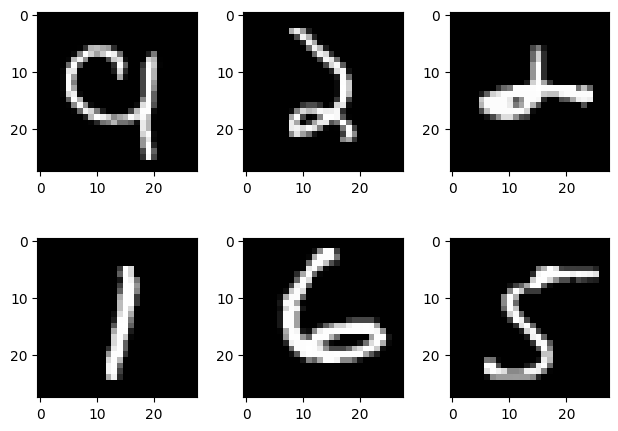

In [28]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(samples[i][0], cmap='gray', interpolation='none')
plt.show()

##### Evaluation Function for the Model

In [30]:
def evaluate_model(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  print(f'Accuracy: {accuracy:.2f}%')
  return accuracy

#####  Train the Model with Different Optimizers

In [34]:
print("Training the model with SGD")
sgd_model = SimpleCNN().to(device)
sgd_train_loss = train_model('SGD', sgd_model, train_loader, criterion, num_epochs)
accuracy_sgd = evaluate_model(sgd_model, test_loader)

Training the model with SGD
Epoch [1/10], Step [2/938], Loss: 2.3197
Epoch [1/10], Step [4/938], Loss: 2.3075
Epoch [1/10], Step [6/938], Loss: 2.3077
Epoch [1/10], Step [8/938], Loss: 2.2934
Epoch [1/10], Step [10/938], Loss: 2.3016
Epoch [1/10], Step [12/938], Loss: 2.3072
Epoch [1/10], Step [14/938], Loss: 2.3051
Epoch [1/10], Step [16/938], Loss: 2.3005
Epoch [1/10], Step [18/938], Loss: 2.2955
Epoch [1/10], Step [20/938], Loss: 2.3064
Epoch [1/10], Step [22/938], Loss: 2.2802
Epoch [1/10], Step [24/938], Loss: 2.2882
Epoch [1/10], Step [26/938], Loss: 2.3088
Epoch [1/10], Step [28/938], Loss: 2.2999
Epoch [1/10], Step [30/938], Loss: 2.3050
Epoch [1/10], Step [32/938], Loss: 2.2941
Epoch [1/10], Step [34/938], Loss: 2.3080
Epoch [1/10], Step [36/938], Loss: 2.2919
Epoch [1/10], Step [38/938], Loss: 2.2857
Epoch [1/10], Step [40/938], Loss: 2.3066
Epoch [1/10], Step [42/938], Loss: 2.2933
Epoch [1/10], Step [44/938], Loss: 2.2968
Epoch [1/10], Step [46/938], Loss: 2.2912
Epoch [1/1

In [36]:
print("Training the model with Adam")
adam_model = SimpleCNN().to(device)
adam_train_loss = train_model('Adam', adam_model, train_loader, criterion, num_epochs)
accuracy_sgd = evaluate_model(adam_model, test_loader)

Training the model with Adam
Epoch [1/10], Step [2/938], Loss: 2.3197
Epoch [1/10], Step [4/938], Loss: 2.2401
Epoch [1/10], Step [6/938], Loss: 2.1576
Epoch [1/10], Step [8/938], Loss: 2.0099
Epoch [1/10], Step [10/938], Loss: 1.7569
Epoch [1/10], Step [12/938], Loss: 1.5821
Epoch [1/10], Step [14/938], Loss: 1.4750
Epoch [1/10], Step [16/938], Loss: 1.1886
Epoch [1/10], Step [18/938], Loss: 1.1125
Epoch [1/10], Step [20/938], Loss: 0.9535
Epoch [1/10], Step [22/938], Loss: 0.8162
Epoch [1/10], Step [24/938], Loss: 0.8198
Epoch [1/10], Step [26/938], Loss: 0.7208
Epoch [1/10], Step [28/938], Loss: 0.5666
Epoch [1/10], Step [30/938], Loss: 0.8223
Epoch [1/10], Step [32/938], Loss: 0.6091
Epoch [1/10], Step [34/938], Loss: 0.6378
Epoch [1/10], Step [36/938], Loss: 0.4972
Epoch [1/10], Step [38/938], Loss: 0.5832
Epoch [1/10], Step [40/938], Loss: 0.3101
Epoch [1/10], Step [42/938], Loss: 0.4493
Epoch [1/10], Step [44/938], Loss: 0.4397
Epoch [1/10], Step [46/938], Loss: 0.4518
Epoch [1/

In [35]:
print("Training the model with RMSprop")
rmsprop_model = SimpleCNN().to(device)
rms_train_loss = train_model('Adam', rmsprop_model, train_loader, criterion, num_epochs)
accuracy_sgd = evaluate_model(rmsprop_model, test_loader)

Training the model with RMSprop
Epoch [1/10], Step [2/938], Loss: 2.2754
Epoch [1/10], Step [4/938], Loss: 2.2146
Epoch [1/10], Step [6/938], Loss: 2.1226
Epoch [1/10], Step [8/938], Loss: 1.8421
Epoch [1/10], Step [10/938], Loss: 1.7309
Epoch [1/10], Step [12/938], Loss: 1.5993
Epoch [1/10], Step [14/938], Loss: 1.4635
Epoch [1/10], Step [16/938], Loss: 1.0243
Epoch [1/10], Step [18/938], Loss: 1.1445
Epoch [1/10], Step [20/938], Loss: 0.8261
Epoch [1/10], Step [22/938], Loss: 0.8210
Epoch [1/10], Step [24/938], Loss: 0.7733
Epoch [1/10], Step [26/938], Loss: 0.6714
Epoch [1/10], Step [28/938], Loss: 0.6210
Epoch [1/10], Step [30/938], Loss: 0.5213
Epoch [1/10], Step [32/938], Loss: 0.6853
Epoch [1/10], Step [34/938], Loss: 0.4545
Epoch [1/10], Step [36/938], Loss: 0.4183
Epoch [1/10], Step [38/938], Loss: 0.5717
Epoch [1/10], Step [40/938], Loss: 0.5946
Epoch [1/10], Step [42/938], Loss: 0.4253
Epoch [1/10], Step [44/938], Loss: 0.3285
Epoch [1/10], Step [46/938], Loss: 0.5343
Epoch 

##### Plotting the training loss for comparison

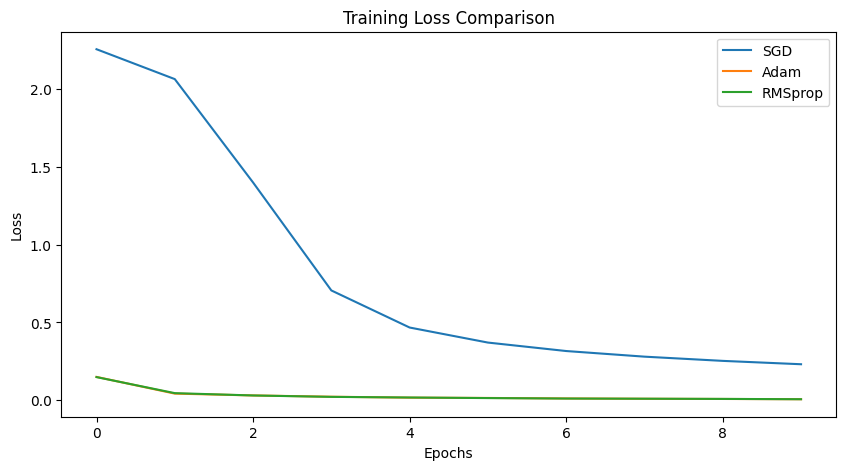

In [38]:
# Plot training loss for comparison
plt.figure(figsize=(10, 5))
plt.plot(sgd_train_loss, label='SGD')
plt.plot(adam_train_loss, label='Adam')
plt.plot(rms_train_loss, label='RMSprop')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Compare the Results

After running the training for each optimizer, compare:

Training Loss: How fast does each optimizer reduce the loss over the epochs?

Accuracy: What accuracy does each optimizer achieve on the test set?

Convergence Speed: How quickly does each optimizer converge?


##### Expected Results:

|Optimizer|Final Accuracy(%)|Convergence|Remarks|
|---|---|---|---|
|**SGD**|Moderate|Slow|SGD tends to converge slower, especially without momentum.|
|**Adam**|High|Fast|Adam generally converges quickly due to its adaptive learning rates and momentum.|
|**RMSprop**|High|Moderate|RMSprop can perform similarly to Adam in terms of accuracy but may converge slightly slower.|

### 9. Discuss the considerations and tradeoffs when choosing the appropriate optimizer for a given neural network architecture and task. Consider factors such as convergence speed, stability, and generalization performance.

|Optimizer|Convergence|Stability|Generalization Performance|
|---|---|---|---|
|**GD**|Traditional gradient descent calculates the gradient over the entire dataset, which leads to slow convergence. It is not practical for large datasets because it updates the weights only after processing the entire dataset.|It is a bit unstable as it can get blocked in the valleys or flat surfaces while reducing the loss.|GD can generalize but without momentum it fails to escape the local minima.|
|**SGD**|Unlike GD, SGD updates the model parameters for every training example, which speeds up learning but can introduce high variance in the updates, leading to oscillations around the optimal value.|While it can be unstable due to its high variance, introducing momentum (SGD with Momentum) reduces oscillations and improves stability, especially when navigating flat areas or valleys in the loss surface.|Due to its high variance, SGD can often escape local minima, which sometimes leads to better generalization compared to more aggressive optimizers. With proper tuning of learning rates and decaying schedules, SGD can generalize well, though it typically converges slower.|
|**Adam**|Adam combines the benefits of both momentum (faster convergence) and adaptive learning rates. It tends to converge faster than both SGD and RMSprop, making it a popular choice for many applications.|Adam typically offers better stability due to its use of both momentum and adaptive learning rates. However, in some cases, especially for very complex tasks or noisy datasets, Adam can lead to poor generalization because it may converge too fast and overfit.|While Adam is good for fast convergence, it sometimes struggles with generalization because it tends to overfit to the training data, especially if used with a high learning rate. Regularization techniques such as dropout or weight decay are often necessary when using Adam.|
|**RMSprop**|RMSprop adapts learning rates based on the data and is faster than vanilla SGD in many cases, especially for deep networks. It can perform similarly to Adam but may need more careful tuning of hyperparameters.|RMSprop offers good stability, especially in noisy environments, due to its adaptive learning rate. It works well in practice for recurrent neural networks (RNNs) and deep architectures.|RMSprop has adaptive learning rates, making it robust on tasks with noisy or non-stationary objectives. It can generalize well but may require learning rate scheduling or other regularization methods to avoid overfitting.|